In [ ]:
#OK

In [1]:
using Plots
using DifferentialEquations
using JuliaMBD
using JuliaMBD.Diagram



using DifferentialEquations
using Plots
using CSV
using DataFrames
using LookupTable
using .JuliaMBD
using .JuliaMBD.Diagram

In [2]:
@model rd_pnt begin
    df = CSV.read("road_surface.csv", DataFrame)
    @parameter begin
        kmph2mps = 0.27778
        I_wheelbase=2.635
        vel_car_kmph=60
        end_of_road_surface=43  ###
    end
    @xmlmodel("METI_Vertical_Vibration.drawio", "2RD_PNT")
end

rd_pnt (generic function with 1 method)

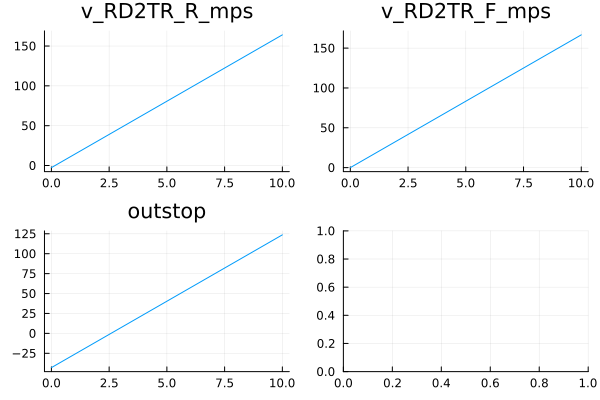

In [3]:
#OneDのy,breaksのdfを変更
@model TestRd_pnt begin
    @block begin
        m = rd_pnt()
    end
    @scope begin
        m.v_RD2TR_R_mps => v_RD2TR_R_mps
        m.v_RD2TR_F_mps => v_RD2TR_F_mps
        m.outstop => outstop
    end
end

m = @compile_derivative TestRd_pnt() #１つでも微分ブロックがあるなら@compile_derivativeを書き足す,この場合はmatlabの結果と異なる場合がある
res = simulate(m, tspan=[0, 10])
plot(res, layout=(2,2))